In [1]:
import pandas as pd

In [2]:
data_frame = pd.read_csv("train.csv")

In [3]:
data_frame

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [4]:
data_frame[["day", "month", "year"]] = data_frame["week"].str.split("/", expand=True)

In [6]:
data_frame = data_frame.drop("week", axis=1)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x, y = data_frame.drop("units_sold", axis=1), data_frame["units_sold"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [9]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [10]:
model.score(x_test, y_test)

0.7380862314780726

In [11]:
model.score(x_train, y_train)

0.9664539435644085

In [12]:
from sklearn.metrics import root_mean_squared_error

y_pred = model.predict(x_test)
rmse = root_mean_squared_error(y_pred, y_test)

rmse

30.808983170919063

In [13]:
data_frame.units_sold.describe()

count    150150.000000
mean         51.674206
std          60.207904
min           1.000000
25%          20.000000
50%          35.000000
75%          62.000000
max        2876.000000
Name: units_sold, dtype: float64

<Axes: >

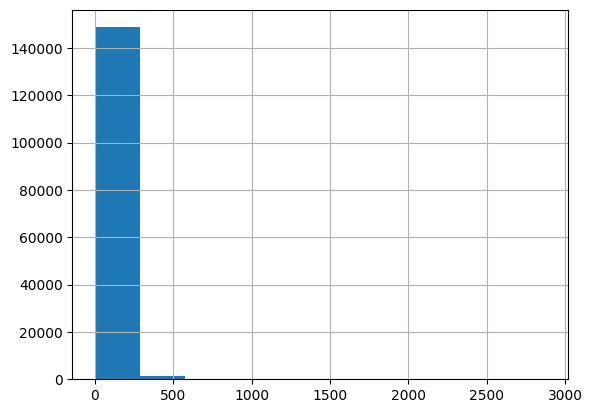

In [14]:
data_frame.units_sold.hist()

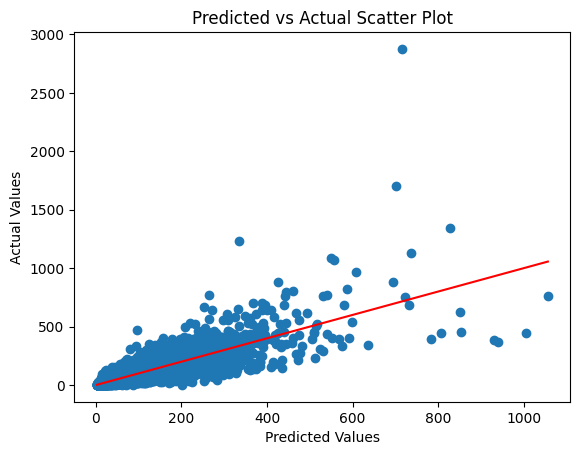

In [20]:
import matplotlib.pyplot as plt
import numpy as np 

plt.scatter(y_pred, y_test)
x_values = np.linspace(y_pred.min(), y_pred.max(), 100)
plt.plot(x_values, x_values, color="red")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual Scatter Plot")
plt.show()